In [19]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
import csv
import scipy

[22.2234316906674, -96.62774048179669, -57.78564677121332]


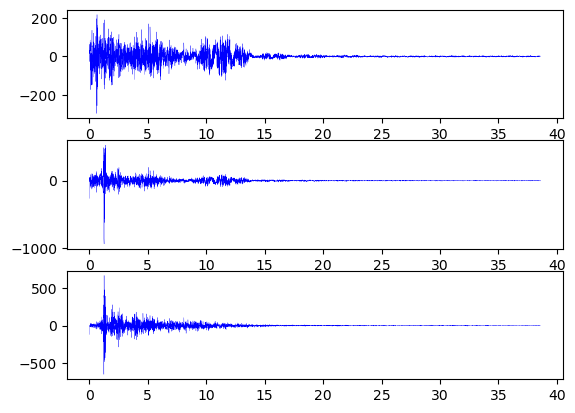

In [20]:
accel = open('/home/joy/data_for_plotting/Accelerometer.csv', newline='')
data = csv.reader(accel, delimiter=',', quotechar='|')
pos = [0.0,0.0,0.0]
v = [0.0,0.0,0.0]
past_t = 0.0
posdata = []
xdata = []
ydata = []
zdata = []
tdata = []
for row in data:
    # print(row[0])
    if row[0] == 'time':
        continue
    for i in range(5):
        row[i]=float(row[i])
        # print(row[i])
        # print(type(row[i]))
    posdata.append([row[2], row[3], row[4]])
    xdata.append(row[4])
    ydata.append(row[3])
    zdata.append(row[2])
    tdata.append(row[1])
    t=row[1]
    # print(t)
    # print(type(t))
    # print(past_t)
    # print(type(past_t))
    dt=t-past_t
    for i in range(3):
        v[i] += row[i+2]*dt
        pos[i] += v[i]*dt
    # print(str(past_t)+str(t)+str(v)+str(pos))
    past_t=t
print(pos[::-1])
n=len(xdata)
framerate=n/past_t
yvalx=scipy.fftpack.rfft(xdata)
# print(yvalx)
yvaly=scipy.fftpack.rfft(ydata)
yvalz=scipy.fftpack.rfft(zdata)
yvals=[yvalx, yvaly, yvalz]
# print(yval)
xval=scipy.fftpack.rfftfreq(n, 1/framerate)
# print(xval)
fig,ax = plt.subplots(nrows=3, ncols=1)
for a,i in zip(ax.flatten(), yvals):
    a.plot(xval, i, color='blue', marker='', linewidth=0.2)

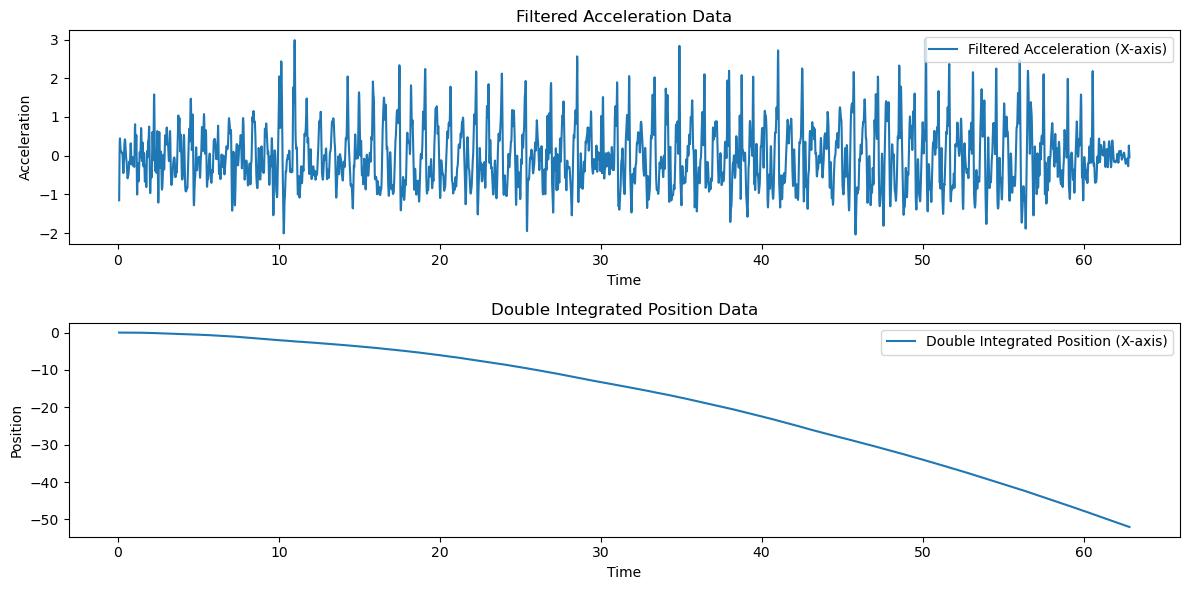

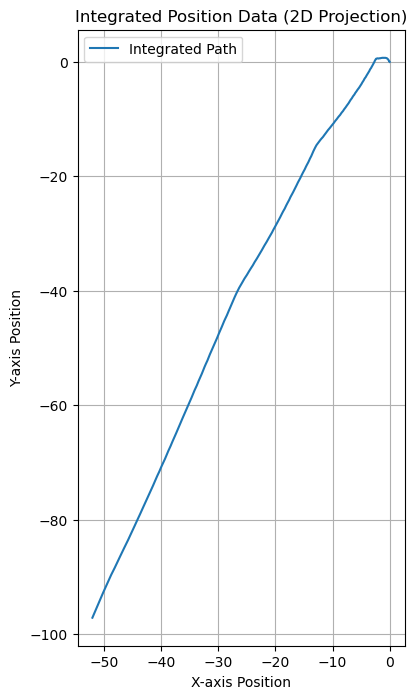

In [26]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

# Open the CSV file
accel = open('/home/joy/data_for_plotting/Accelerometer.csv', newline='')
data = csv.reader(accel, delimiter=',', quotechar='|')

# Initialize variables
posdata = []
tdata = []

# Read data from CSV
for row in data:
    if row[0] == 'time':
        continue
    
    # Convert row data to floats
    for i in range(5):
        row[i] = float(row[i])
    
    # Append data to lists
    posdata.append([row[2], row[3], row[4]])  # Assuming columns 2, 3, 4 are accelerometer data
    tdata.append(float(row[1]))

# Close the CSV file
accel.close()

# Calculate framerate
n = len(posdata)
framerate = n / tdata[-1]

# Apply a Butterworth filter to posdata (acceleration data)
N = 4  # Order of the filter
cutoff_freq = 15  # Cutoff frequency in Hz
b, a = scipy.signal.butter(N, cutoff_freq / (framerate / 2), btype='low', analog=False)
filtered_posdata = scipy.signal.filtfilt(b, a, np.array(posdata), axis=0)

# Initialize arrays for velocity and position
v = np.zeros_like(filtered_posdata)
filtered_pos = np.zeros_like(filtered_posdata)

# Double integration to get position
for i in range(3):  # Assuming three axes (X, Y, Z)
    for j in range(1, n):
        dt = tdata[j] - tdata[j-1]
        v[j, i] = v[j-1, i] + filtered_posdata[j, i] * dt
        filtered_pos[j, i] = filtered_pos[j-1, i] + v[j, i] * dt

# Plotting original acceleration and integrated position data
plt.figure(figsize=(12, 6))

# Plot original filtered acceleration data
plt.subplot(2, 1, 1)
plt.plot(tdata, filtered_posdata[:, 0], label='Filtered Acceleration (X-axis)')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Filtered Acceleration Data')
plt.legend()

# Plot double-integrated position data
plt.subplot(2, 1, 2)
plt.plot(tdata, filtered_pos[:, 0], label='Double Integrated Position (X-axis)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Double Integrated Position Data')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(filtered_pos[:, 0], filtered_pos[:, 1], label='Integrated Path', marker=' ', markersize=3)
plt.xlabel('X-axis Position')
plt.ylabel('Y-axis Position')
plt.title('Integrated Position Data (2D Projection)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio for X and Y axes
plt.show()
